# Multiclass and multioutput algorithms

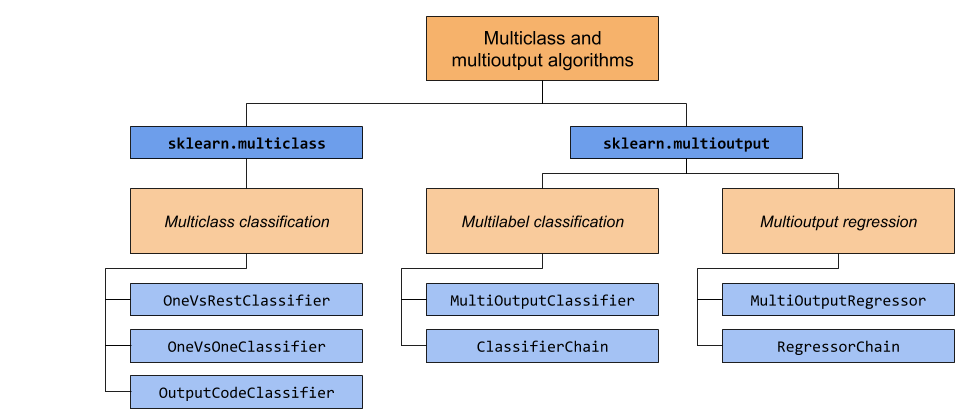

https://scikit-learn.org/stable/modules/multiclass.html

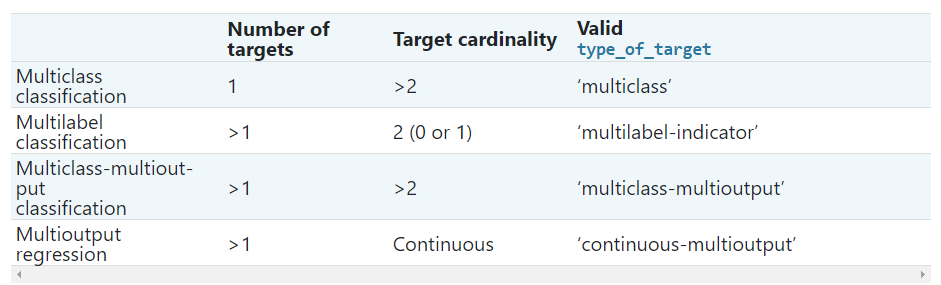

## Multiclass

Multiclass classification is a classification task with more than **two classes**. Each sample **can only be labeled as one class**.

For example, classification using features extracted from a set of images of fruit, where each image may either be of an orange, an apple, or a pear. Each image is one sample and is labeled as one of the 3 possible classes. Multiclass classification makes the assumption that each sample is assigned to one and only one label - one sample cannot, for example, be both a pear and an apple.

While all scikit-learn classifiers are capable of multiclass classification, the meta-estimators offered by sklearn.multiclass permit changing the way they handle more than two classes because this may have an effect on classifier performance (either in terms of generalization error or required computational resources).


In [2]:
import numpy as np
y = np.array(['apple', 'pear', 'apple', 'orange'])
print(y)

['apple' 'pear' 'apple' 'orange']


In [4]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
y = np.array(['apple', 'pear', 'apple', 'orange'])
y_dense = LabelBinarizer().fit_transform(y)
print(y_dense)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]]


**OneVersusRest**

In [44]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
X, y = datasets.load_iris(return_X_y=True)
y[np.random.random(len(y)) < 0.2] = 3
y[np.random.random(len(y)) < 0.2] = 4

In [45]:
np.unique(y)

array([0, 1, 2, 3, 4])

In [46]:
model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y)
model.predict(X)

C:\Users\wanghuan\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\wanghuan\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\wanghuan\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\wanghuan\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
model.estimators_

[LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0)]

**OneVersusOne**

In [48]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

In [49]:
model = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y)
model.predict(X)

C:\Users\wanghuan\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\wanghuan\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\wanghuan\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\wanghuan\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\wanghuan\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\wanghuan\AppData\Roaming\P

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 4, 1, 1, 4, 1,
       3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
from itertools import combinations
comb = combinations([0,1,2,3,4],2)
print(f"Need {len(list(comb))} estimators")

Need 10 estimators


In [50]:
model.estimators_

(LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0),
 LinearSVC(random_state=0))

### Multi-Label / Multi-Output - Not mutually exclusive

Multilabel classification support can be added to any classifier with MultiOutputClassifier. This strategy consists of fitting **one classifier per target**. This allows multiple target variable classifications. The purpose of this class is to extend estimators to be able to estimate a series of target functions (f1,f2,f3…,fn) that are trained on a single X predictor matrix to predict a series of responses (y1,y2,y3…,yn).

You can find a usage example for MultiOutputClassifier as part of the section on Multiclass-multioutput classification since it is a generalization of multilabel classification to multiclass outputs instead of binary outputs.

In [63]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
X, y1 = make_classification(n_samples=10, n_features=100,
                            n_informative=30, n_classes=3,
                            random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)

Y = np.vstack((y1, y2, y3)).T

In [67]:
X.shape

(10, 100)

In [64]:
Y

array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

In [65]:
n_samples, n_features = X.shape # 10,100
n_outputs = Y.shape[1] # 3
n_classes = 3
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
multi_target_forest.fit(X, Y).predict(X)

array([[2, 2, 0],
       [1, 2, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 2, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])

### ClassifierChain   

Classifier chains (see ClassifierChain) are a way of combining **a number of binary classifiers** into a **single multi-label model** that is capable of exploiting correlations among targets.

For a multi-label classification problem with N classes, **N binary classifiers are assigned an integer between 0 and N-1**. These integers define the order of models in the chain. **Each classifier is then fit on the available training data plus the true labels of the classes whose models were assigned a lower number**.

**When predicting, the true labels will not be available. Instead the predictions of each model are passed on to the subsequent models in the chain to be used as features.**

Clearly the order of the chain is important. The first model in the chain has no information about the other labels while the last model in the chain has features indicating the presence of all of the other labels. In general one does not know the optimal ordering of the models in the chain so typically many randomly ordered chains are fit and their predictions are averaged together.

In [68]:
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import ClassifierChain
X, Y = make_multilabel_classification(
   n_samples=12, n_classes=3, random_state=0
)
X_train, X_test, Y_train, Y_test = train_test_split(
   X, Y, random_state=0
)

In [70]:
Y

array([[0, 1, 0],
       [0, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 0],
       [1, 1, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [69]:
base_lr = LogisticRegression(solver='lbfgs', random_state=0)
chain = ClassifierChain(base_lr, order='random', random_state=0)
chain.fit(X_train, Y_train).predict(X_test)
chain.predict_proba(X_test)

array([[0.83873122, 0.94314231, 0.4576149 ],
       [0.88781656, 0.3684047 , 0.26409868],
       [0.03213614, 0.99359669, 0.06257921]])

### Multi-Output Regressor

In [81]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
X, y = make_regression(n_samples=10, n_targets=3, random_state=1)

In [82]:
y

array([[-154.75925123, -147.04008173,  -50.0391129 ],
       [   7.12196236,    5.12947161,  -81.46271129],
       [-187.90082901, -100.44752664,   13.89261407],
       [-141.63065051,   95.03154575, -191.48634356],
       [  97.03431452,  165.35268762,  139.52452391],
       [ 123.9283255 ,   21.25870198,   -7.84234868],
       [-122.25363653,  -85.16607897, -107.12559788],
       [ -30.17072278,  -94.81208397,   12.17160241],
       [ 140.73115332,  176.51479747,  -17.50467183],
       [ 149.38584071,  -81.15780316,   -5.72757681]])

In [83]:
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X, y).predict(X)

array([[-154.75474165, -147.03498585,  -50.03812219],
       [   7.12165031,    5.12914884,  -81.46081961],
       [-187.8948621 , -100.44373091,   13.88978285],
       [-141.62745778,   95.02891072, -191.48204257],
       [  97.03260883,  165.34867495,  139.52003279],
       [ 123.92529176,   21.25719016,   -7.84253   ],
       [-122.25193977,  -85.16443186, -107.12274212],
       [ -30.170388  ,  -94.80956739,   12.16979946],
       [ 140.72667194,  176.50941682,  -17.50447799],
       [ 149.37967282,  -81.15699552,   -5.72850319]])

In [84]:
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()
chain = RegressorChain(base_estimator=logreg, order=[0, 1, 2]).fit(X, y)
chain.predict(X)

array([[-154.75925123, -147.04008173,  -50.0391129 ],
       [   7.12196236,    5.12947161,  -81.46271129],
       [-187.90082901, -100.44752664,   13.89261407],
       [-141.63065051,   95.03154575, -191.48634356],
       [  97.03431452,  165.35268762,  139.52452391],
       [ 123.9283255 ,   21.25870198,   -7.84234868],
       [-122.25363653,  -85.16607897, -107.12559788],
       [ -30.17072278,  -94.81208397,   12.17160241],
       [ 140.73115332,  176.51479747,  -17.50467183],
       [ 149.38584071,  -81.15780316,   -5.72757681]])

**到这儿我们发现，多输出问题的sklearn模型到底怎么做了**

### 剩下的就是构建一个好的数据集了

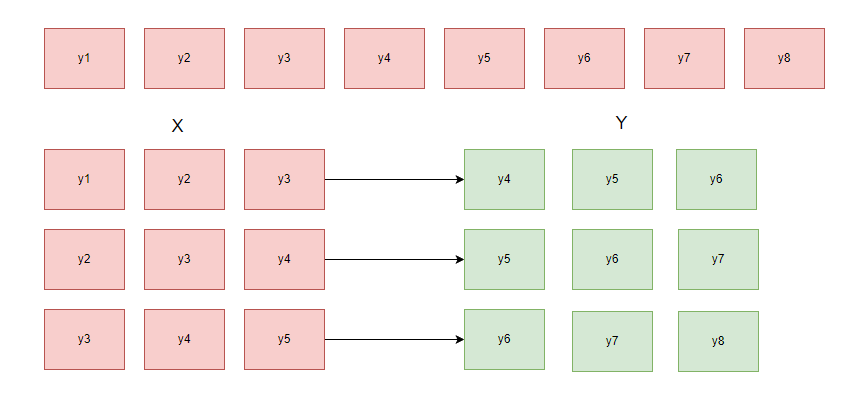

### 你猜我发现了什么？ - Skforecast

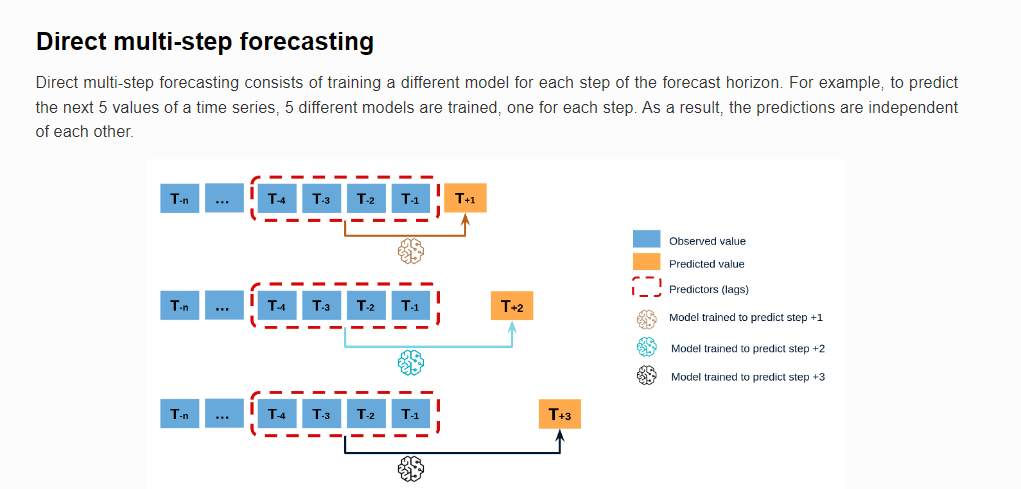


https://www.cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html

### 核心思想正式我们上面说的multioutput regression

Direct multi-step forecasting consists of **training a different model** for **each step of the forecast horizon**. For example, to predict the next 5 values of a time series, **5 different models are trained**, one for each step. As a result, the predictions are independent of each other.

#### 不仅有多步预测，还有衍生特征
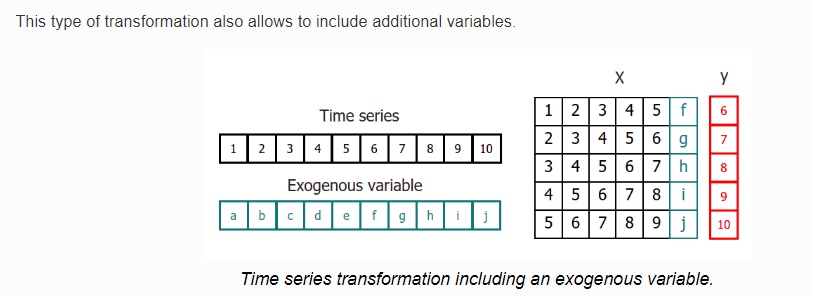

In [90]:
import matplotlib.pyplot as plt

In [86]:
import pandas as pd


# Data download
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv'
data = pd.read_csv(url, sep=',')

In [87]:
# Data preparation
# ==============================================================================
data = data.rename(columns={'fecha': 'date'})
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
data = data.set_index('date')
data = data.rename(columns={'x': 'y'})
data = data.asfreq('MS')
data = data.sort_index()
data.head()

,y,exog_1,exog_2
date,,,
1992-04-01,0.379808,0.958792,1.166029
1992-05-01,0.361801,0.951993,1.117859
1992-06-01,0.410534,0.952955,1.067942
1992-07-01,0.483389,0.958078,1.097376
1992-08-01,0.475463,0.956370,1.122199


In [88]:
# Verify that a temporary index is complete
# ==============================================================================
(data.index == pd.date_range(start=data.index.min(),
                             end=data.index.max(),
                             freq=data.index.freq)).all()

True

Train dates : 1992-04-01 00:00:00 --- 2005-06-01 00:00:00  (n=159)
Test dates  : 2005-07-01 00:00:00 --- 2008-06-01 00:00:00  (n=36)


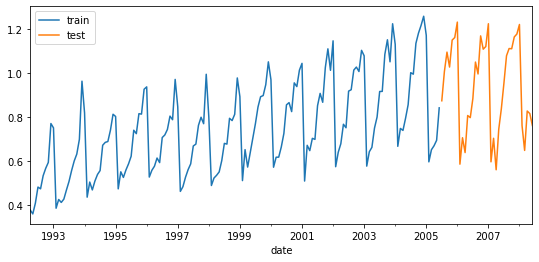

In [91]:
# Split data into train-test
# ==============================================================================
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

### 先走捷径，再造轮子，多步多特征，sklearn解决方案 = skforecast